In [3]:
import os

import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns
import matplotlib.pyplot as plt

from network import Tacotron
from dataset import TTS_Dataset
from loss import TacoLoss

from utils.misc import save_model

[INFO] Load data from data
[INFO] Preprocess the text (text -> index)
[INFO] Sort the data by length of sentence
[INFO] Data size : 12853
Epoch [0/10], Iter [1/12853], loss: 0.6742
[INFO] Save attention heatmap!!


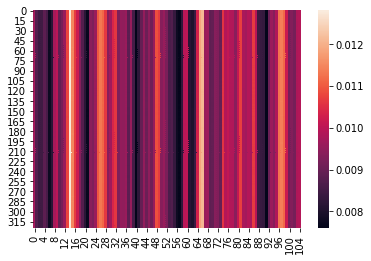

Save Model !!
Epoch [0/10], Iter [1001/12853], loss: 0.1285
[INFO] Save attention heatmap!!


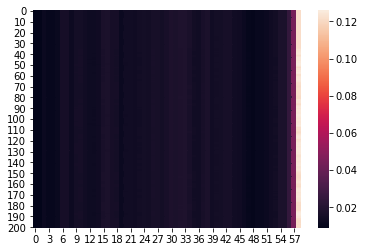

Save Model !!


KeyError: '“'

In [4]:
def train():
    epochs = 10
    batch_size = 4

    # load dataset
    dataset = TTS_Dataset('data', batch_size=4)

    ## model
    model = Tacotron(dim_embed=256, dim_mel=80, dim_mag=1025, is_training=True)

    # loss
    criterion = TacoLoss()

    # optimizer
    optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.99))

    total_batch = len(dataset)
    for epoch in range(epochs):
        for idx, data in enumerate(dataset):
            model.train()
            output_mel, output_mag, align = model(data['text'], data['mel'], data['text_len'], data['mel_len'])
            loss = criterion(output_mel, data['mel'], output_mag, data['mag'])

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if ((epoch * total_batch) + idx) % 1000 == 0:
                print('Epoch [%d/%d], Iter [%d/%d], loss: %.4f'
                      % (epoch, epochs, idx + 1, total_batch, loss.item()))

                save_att_result('result', align[0].detach().numpy(), epoch, idx, loss.item())
                save_model('model', 'Taco', model, {'loss': loss.item()})

def save_att_result(path, align, epoch, iter, loss):
    print('[INFO] Save attention heatmap!!')
    sns.heatmap(align)
    plt.show()

if __name__ == "__main__":
    train()